# K-Means Clustering in Python

Clustering is a type of Unsupervised Learning. This is very often used when you don't have labeled data. K-Means Clustering is one of the popular clustering algorithm. The goal of this algorithm is to find groups (clusters) in the given data. In this post we will implement K-Means algorithm using Python from scratch.

## K-Means Clustering

K-Means is a very simple algorithm which clusters the data into _K_ number of clusters. The following image from [PyPR](http://pypr.sourceforge.net/kmeans.html#k-means-example) is an example of K-Means Clustering.

<img src='files/img/kmeans.jpg'>

### Use Cases

K-Means is widely used for many applications.
-  Image Segmentation
-  Clustering Gene Segmentation Data
-  News Article Clustering
-  Clustering Languages
-  Species Clustering
-  Anomaly Detection

### Algorithm

Our algorithm works as follows, assuming we have inputs $x_1$, $x_2$, $x_3$, ..., $x_n$ and value of _K_
-  Step 1 - Pick random _K_ points as cluster centers called centroids.
-  Step 2 - Assign each $x_i$ to nearest cluster by calculating its distance to each centroid.
-  Step 3 - Find new cluster center by taking the average of the assigned points.
-  Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

<img src='files/img/kmeans.gif'>

The above animation is an example of running K-Means Clustering on a two dimensional data.

#### Step 1

We randomly pick _K_ cluster centers (centroids). Let's assume these are $c_1$, $c_2$, ..., $c_k$ and we can say that:

$$C = c_1, c_2, ..., c_k$$

$C$ is the set of all centroids.

#### Step 2

In this step we assign each input value to closest center. This is done by calculating Euclidean (L2) distance between the point and each centroid.

$$\underset{c_i \in C}{\mathrm{argmin}} \; dist(c_i, x)^2$$

Where $dist(.)$ is the Euclidean distance.

#### Step 3

In this step, we find the new centroid by taking the average of all the points assigned to that cluster.

$$c_i = \frac{1}{|S_i|}\sum_{x_i \in S_i} x_i$$

$S_i$ is the set of all points assigned to the $i^{th}$ cluster.

#### Step 4

In this step, we repeat step 2 and 3 until none of the cluster assignments change. That means until our clusters remain stable, we repeat the algorithm.

### Choosing the Value of K

We often know the value of K. In that case we use the value of K. Else we use the Elbow Method.

<img src='files/img/elbow.jpg'>

We run the algorithm for different values of K (say K = 1 to 10) and plot the K values against SSE (Sum of Squared Errors) and select the value of K for the elbow point as shown in the figure.

### Implementation using Python

The dataset we are gonna use has 3000 entries with 3 clusters. So we already know the value of K.

Checkout this [Github Repo](https://github.com/mubaris/friendly-fortnight) for full code and dataset.

We will start by importing the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset
data = pd.read_csv('data/xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


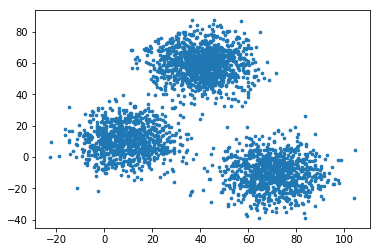

In [2]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, s=7)

In [3]:
# Euclidean distance calculator
def dist(a, b, ax=None):
    return np.linalg.norm(a - b, axis=ax)

In [4]:
# Number of clusters
k = 3

# X coordinates of random centroids
C_x = np.random.randint(f1.min(), f1.max(), k)

# Y coordinates of random centroids
C_y = np.random.randint(f2.min(), f2.max(), k)

C = np.array(list(zip(C_x, C_y)))
print(C)

[[ 83 -34]
 [103  39]
 [ 48 -32]]


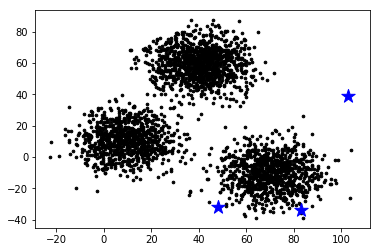

In [5]:
# Plotting along with the centroids
plt.scatter(f1, f2, s=7, c='black')
plt.scatter(C_x, C_y, marker='*', s=200, c='blue')
plt.show()

In [6]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

# To store the cluster assignments of the data
clusters = np.zeros(len(X))

# Error function - distance between the new centroid and the old centroid
error = dist(C, C_old)

# Loop will run till the error becomes zero
while error != 0:
    # Assigning each data to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C, ax=1)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
    # Storing the old centroid values
    np.copyto(C_old, C)
    
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
            
    # Update the error
    error = dist(C, C_old)

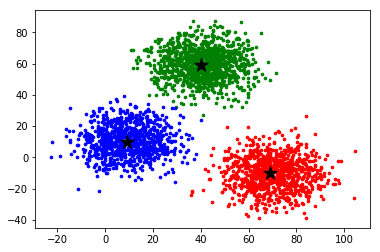

In [7]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black')